# Example usage of Peruvian National Football Team Results database

This is an example usage of the Peruvian National Football Team Results database (https://www.kaggle.com/datasets/arturoarias12/peruvian-national-football-team-results/data). Three simple queries are performed for demonstration purposes.

In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the DataFrame with Pandas
file_path = '/kaggle/input/peruvian-national-football-team-results/peru_match_results.csv'
df = pd.read_csv(file_path)

## 1. Peru results against neighboring countries

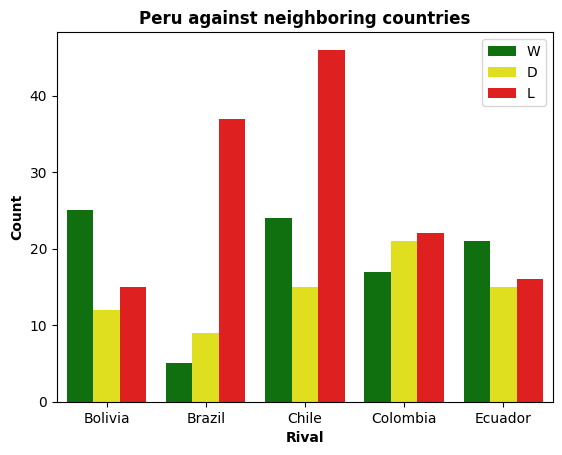

In [2]:
# Filter for neighboring countries
countries = ['Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador']
filtered_df = df[df['rival'].isin(countries)]

# Group and count results
results = filtered_df.groupby(['rival', 'awarded_result']).size().reset_index(name='count')

# Reordering results for the plot
result_order = ['W', 'D', 'L']
results['awarded_result'] = pd.Categorical(results['awarded_result'], categories=result_order, ordered=True)

# Creating plot with Seaborn and Matplotlib
sns.barplot(data=results,
            x='rival',
            y='count',
            hue='awarded_result',
            palette={'W': 'green', 'L': 'red', 'D': 'yellow'})

plt.xlabel('Rival', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Peru against neighboring countries', fontweight='bold')
plt.legend()
plt.show()

## 2. Print the percentage of points obtained by coach Ricardo Gareca in official matches

In [3]:
# Filter for official matches coached by Ricardo Gareca
official_gareca_matches = df[(df['coach'] == 'Ricardo Gareca') & (df['official'] == 1)]

# Calculate the points obtained in official matches
points = official_gareca_matches['awarded_result'].str.count('W').sum()*3 + official_gareca_matches['awarded_result'].str.count('D').sum()
total_possible_points = len(official_gareca_matches) * 3
performance_percentage = (points / total_possible_points) * 100

print(f'Performance percentage of Ricardo Gareca in official matches: {performance_percentage:.2f}%')

Performance percentage of Ricardo Gareca in official matches: 48.21%


## 3. Wins, draws, and loses in Estadio Monumental U and Estadio Alejandro Villanueva

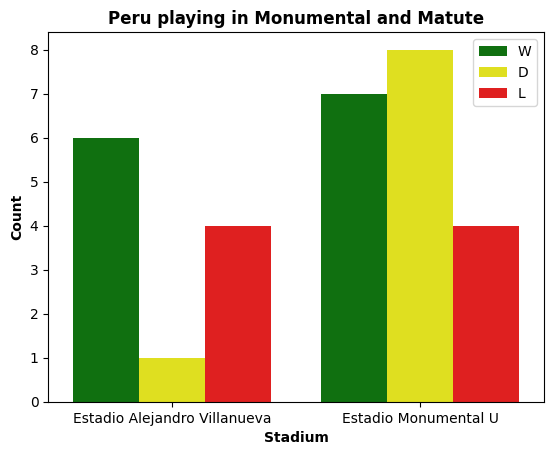

In [4]:
# Filter for Estadio Monumental U and Estadio Alejandro Villanueva
stadiums = ['Estadio Monumental U', 'Estadio Alejandro Villanueva']
stadium_results = df[df['stadium'].isin(stadiums)].groupby(['stadium', 'awarded_result']).size().reset_index(name='count')

# Reordering results for the plot
result_order = ['W', 'D', 'L']
stadium_results['awarded_result'] = pd.Categorical(stadium_results['awarded_result'], categories=result_order, ordered=True)

# Creating plot with Seaborn and Matplotlib
sns.barplot(data=stadium_results,
            x='stadium',
            y='count',
            hue='awarded_result',
            palette={'W': 'green', 'D': 'yellow', 'L': 'red'})
plt.xlabel('Stadium', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Peru playing in Monumental and Matute', fontweight='bold') # Matute is the colloquial name of Estadio Alejandro Villanueva
plt.legend()
plt.show()